<a href="https://colab.research.google.com/github/DinalAdithya/Learning-PYTorch/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# PyTorch Workflow
topics = {1: "Data (prepare and load)",
          2: "Build model",
          3: "Fitting the model to data (tranning)",
          4: "Making prediction and evaluvating model(inference)",
          5: "Saving and loading model",
          6: "Putting it all together"}


In [2]:
import torch
from torch import nn # nn contains all of pytorch's building blocks for neural networks
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

#Data (prepare and load)

Machine learning inlude 2 parts

1.   Get data into a numerical representation.
2.   Buil a model to learn patterns in taht numerical representation



In [3]:
# create known parameters
weight = 0.7
bias   = 0.3

# Create
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze( dim=1 )
y = weight * x + bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(x),len(y)

(50, 50)

## Spliting data into traning and test sets (one of the most importent consept)

In [5]:
# Create a traning/test split

train_split = int(0.8 *len(x))
train_split

40

In [6]:
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

### Visualize our data

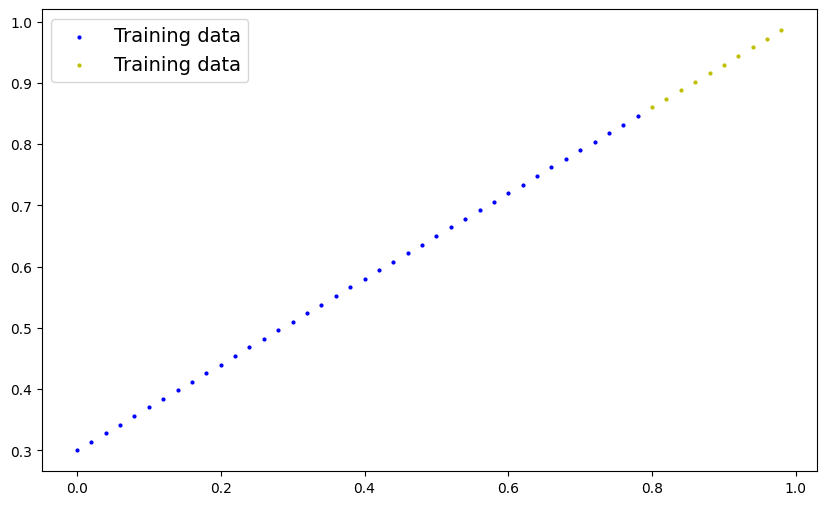

In [7]:
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     prediction = None):
  """
  plots training data, test data and compares predictions.

  """

  plt.figure(figsize=(10, 6))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s= 4, label="Training data")

  #plot test data in yellow
  plt.scatter(test_data, test_labels, c = "y", s = 4, label="Training data")

  # Are there prediction?
  if prediction is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, prediction, c = "r", s = 4, label = "Predictions")

  # show the legend ( Show lables)
  plt.legend( prop = {"size" : 14} )

plot_predictions()

# Build Model

In [8]:
import torch
from torch import nn

# Create linear regresion model class

class LinearRegressionModel(nn.Module):
  # allmost everything in pytorch inheret from nn.module

  def __init__(self):
    super().__init__()

    # initialize model parameters
    self.weights = nn.Parameter(torch.randn( 1, #start ith random weights(this value wil change as the model learn)
                                             requires_grad=True,
                                             dtype=torch.float))
    self.bias = nn.Parameter(torch.randn( 1,
                                          requires_grad=True,
                                          dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is input data
    return self.weights * x + self.bias  # this is the linear regression formula



# Fitting the model to data

In [9]:
# Content of the model

## create a random seed (becouse these values are random if we didnt use seed every time the values will be diference)
torch.manual_seed(42)

## create intence of the model ( this is a subclass of nn.module )
model_0 = LinearRegressionModel()

## check out parameters
params = list(model_0.parameters())
print(params)


[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [10]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
print(f"Ideal values of weight :", weight,"and bias :", bias)
# we need to get the move above random values to as close as these values
# most caces we dont know what even is the ideal values are

Ideal values of weight : 0.7 and bias : 0.3


## Extra


1. randn use becouse we need random numbers from normal distribution
2. if we use rand it will give us uniform distribution we dont use it here
3. choise between "randn" & "rand" depend on the spesicfic requirment of the model



In [12]:
# with out manual_seed()
torch.randn(1) , torch.randn(1) # this is defferent each time

(tensor([0.2345]), tensor([0.2303]))

In [13]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [14]:
torch.manual_seed(42) # but this is not different each time its the same
torch.randn(1)

tensor([0.3367])

In [15]:
torch.manual_seed(40) # acoding to the menual seed number
torch.randn(1)

tensor([0.9307])

# Making prediction and evaluvating model


1.   using torch.inference_mode() inference mode disables unnessesry thing for the prediction
2. we can do the same with torch.no_grad() but mostly use inference_mode()



In [16]:
# make the prediction with model
with torch.inference_mode(): # infreence is word for predictions that use in pytorch
  y_preds = model_0(x_test)
y_preds



tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

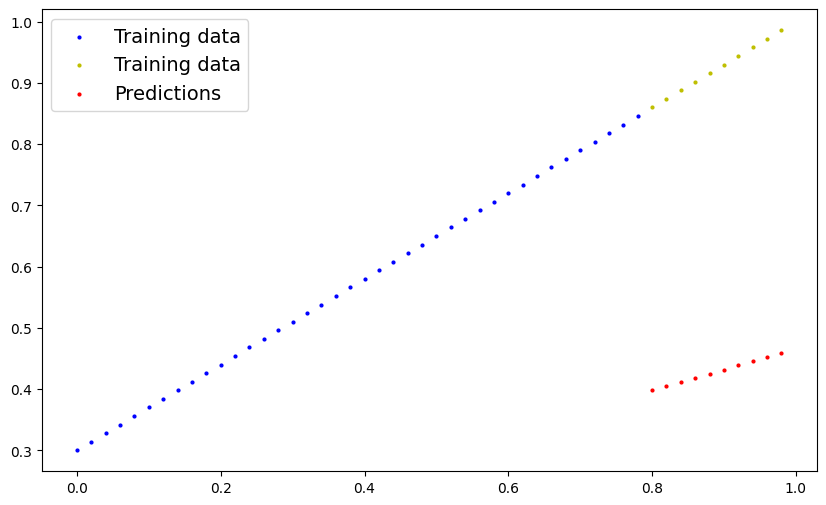

In [17]:
plot_predictions( prediction = y_preds )

## Train Model
1. Model should move from **unknown** parameters to **known** parameters

2. From poor represntation of the data to better representation


*Note: loss less function may call as cost or criterion function*



---

Things need to be train:

***Less function*** :  how worng your out put to ideal output

***Optimizer*** : Adjusts the model's parameters to imporve loss function

1.   lr(lerning rate) - the lr is a hyper parameter that defines how big/small the optimizer changes the parameters

2.   params - model parameter you'd like to optimize [ params = model_0.parameter() ]




---



For pytorch we need :

*   A training loop
*   A testing loop



In [18]:
# check out models parameters [ parameter is a value model sets it self ]
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
import torch
from torch import nn

# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # lr = lerning rate -> possibly the most important hyperparameter you can set


### Building a training loop (and a testin loop)



1. **Loop trough data**
2. **Forward pass / Forward propergation** - data moving through function
3. **Calculate the loss** - compare forward pass predictions to ground truth labels
4. **optimizer zero grad**
5. **loss backward / backpropergation** - move backwards through the network to calculate the gradients of each of the parameter of i=our model with respect to the loss
6. **optimizer step / gradiant descent** - use the optimizer to adjust our model's parameter to try and improve the loss





In [20]:
torch.manual_seed(42)

# An epoch is one loop through data(Hyper parameter =  because we set it our selves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []


### Training

# 1. loop through the data
for epoch in range (epochs):
  # Set the model to training mode
  model_0.train() # Train mode in pytorch set all parameter that requre gradiants to require gradients

  # 2. Forward pass
  y_pred = model_0(x_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 4. optimizer zero grad
  optimizer.zero_grad()

  # 5. loss backward / backpropergation
  loss.backward()

  # 6. optimizer step / gradiant descent
  optimizer.step()

  model_0.eval() # Turn off the gradints tracking

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(x_test)
    test_loss = loss_fn(test_pred, y_test)

  # print
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch : {epoch} | Loss : {loss} | Test Loss = {test_loss}")
    print(model_0.state_dict())


Epoch : 0 | Loss : 0.31288138031959534 | Test Loss = 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10 | Loss : 0.1976713240146637 | Test Loss = 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20 | Loss : 0.08908725529909134 | Test Loss = 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch : 30 | Loss : 0.053148526698350906 | Test Loss = 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch : 40 | Loss : 0.04543796554207802 | Test Loss = 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch : 50 | Loss : 0.04167863354086876 | Test Loss = 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch : 60 | Loss : 0.03818932920694351 | Test Loss = 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('

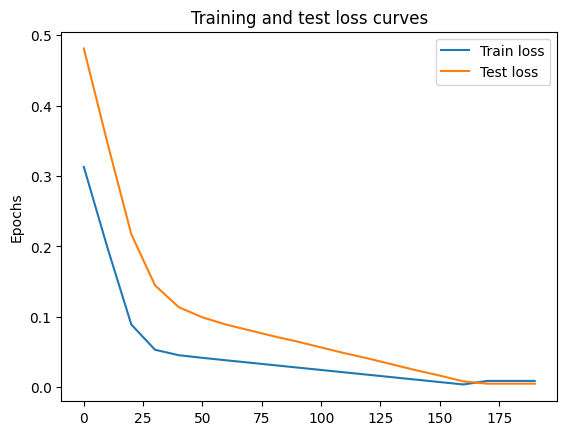

In [21]:
# plot the loss curves
plt.plot(epoch_count,torch.tensor(loss_values).numpy(), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Epochs")
plt.legend();


In [22]:
weight, bias

(0.7, 0.3)

In [23]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)

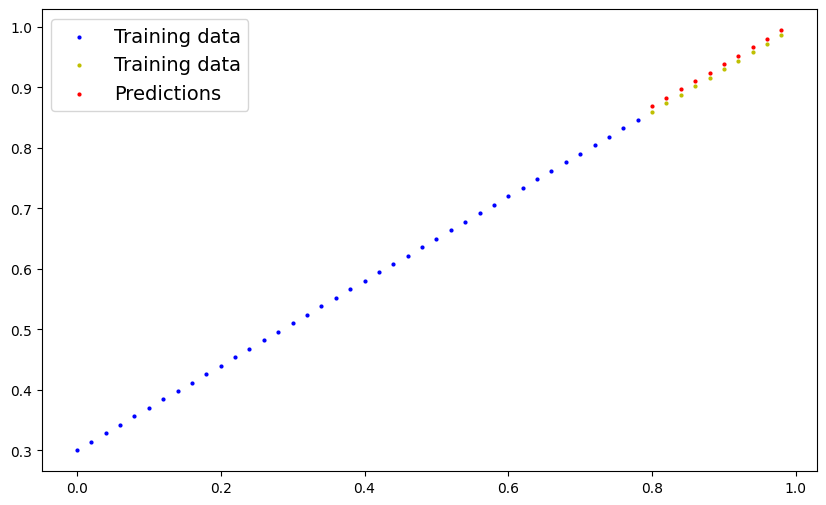

In [24]:
plot_predictions(prediction = y_preds_new)

####Tranining


In [25]:
# tranining :D
'''epochs = 1
for epoch in range (epochs):
  y_pred = model_0(x_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()'''


'''epochs = 1
for ecpoch in range(epochs):
  y_pred = model_0(x_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # to close
  model_0.evel()'''

'epochs = 1\nfor ecpoch in range(epochs):\n  y_pred = model_0(x_train)\n  loss = loss_fn(y_pred, y_train)\n  optimizer.zero_grad()\n  loss.backward()\n  optimizer.step()\n\n  # to close\n  model_0.evel()'

# Saving and loading model

1. torch.save() - you can save object in python's **pickle** format
2. torch.load() - you can load saved object
3. torch.nn.module.load_state_dict() - this allows to load a model's saved dictionary

In [26]:
### Saving
from pathlib import Path

# 1. chreate models derectry
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3.  Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH )


Saving model to : models/01_pytorch_workflow_model_0.pt


In [27]:
!ls -1 models

01_pytorch_workflow_model_0.pt


## Loading a PyThorch model
Since we saved our model's state_dict() rather thatn entire model, we'll create a new instance of our model class and load the saved state_dict() into that

In [28]:
### Loading
# to load in saved state_dict we have to instantiate a new instance of our mode class
loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0 (this wi;; update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [29]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [30]:
# Make some prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(x_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [31]:
# make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(x_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [32]:
# compare loaded model preds with original model preds

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [33]:
topics

{1: 'Data (prepare and load)',
 2: 'Build model',
 3: 'Fitting the model to data (tranning)',
 4: 'Making prediction and evaluvating model(inference)',
 5: 'Saving and loading model',
 6: 'Putting it all together'}

# Putting it all together

In [34]:
# Import pytorch
import torch
from torch import nn
import matplotlib.pyplot as plt

# check version
torch.__version__

'2.1.0+cu121'

Device-agnostic code

if gpu availble else cpu

In [35]:
# setup
device = "cuda" if torch.cuda.is_available()else "cpu"
print(f"Using device: {device}")

Using device: cuda


## Data


In [36]:
# Crreate some data
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# create x & y (feature and labels)
x = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * x + bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [37]:
len(x), len(y)

(50, 50)

In [38]:
# split data
train_split = int(0.8 * len(x)) # 0.8 for 80%
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_train),len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [39]:
x_train.squeeze(dim = 1), y_train.squeeze(dim = 1)

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460]))

In [40]:
x_test.squeeze(dim = 1), y_test.squeeze(dim=1)

(tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
         0.9860]))

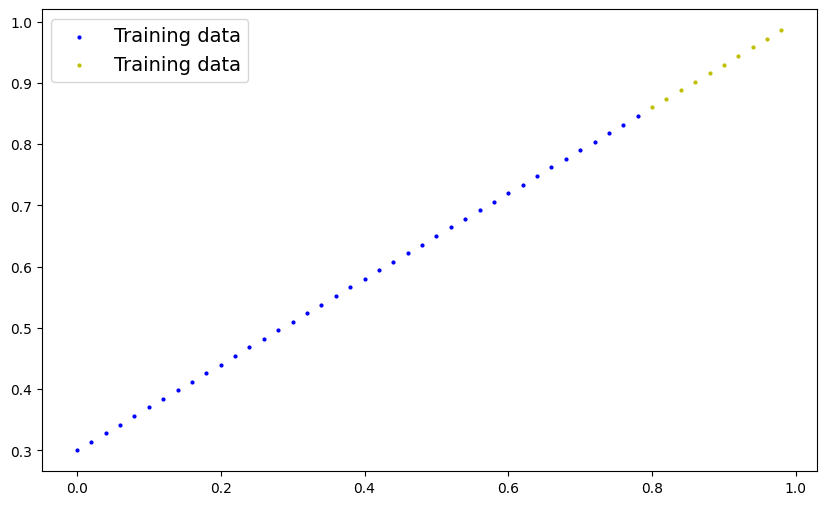

In [41]:
plot_predictions(x_train, y_train, x_test, y_test)

In [42]:
topics

{1: 'Data (prepare and load)',
 2: 'Build model',
 3: 'Fitting the model to data (tranning)',
 4: 'Making prediction and evaluvating model(inference)',
 5: 'Saving and loading model',
 6: 'Putting it all together'}

##Build model

In [43]:
from torch import nn

class LinearRegressionModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.weight = nn.parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype = float ))
    self.bias = nn.parameter(torch.rand(1,
                                        require_grad = True,
                                        dtype = float ))

  def forward (self, x :torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias



In [44]:
# new way to build a model

from torch import nn

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

                    #should be a tensor   # this will retun a tensor
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


#set the manual seed

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [45]:
next(model_1.parameters()).device

device(type='cpu')

In [46]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [47]:
list(model_1.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

## Traning

1. loss fun
2. Optimizer
3. Trenin & testing loop

In [48]:
# set up loss fun
loss_fn = nn.L1Loss()

Optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)


In [49]:
### Traning loop
torch.manual_seed(42)

epochs = 200

# put data on the same target device(device agnostic code for data)
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

for epoch in range (epochs):
  model_1.train()

  # 1 forwar pass
  y_pred = model_1(x_train)

  # 2 Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3 Optimizer zero grad
  Optimizer.zero_grad()

  # 4 back propergation
  loss.backward()

  # 5 optimizer
  Optimizer.step()

  model_1.eval()

  ### Testing

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(x_test)
    test_loss = loss_fn(test_pred, y_test)

  ## print
  if epoch % 10 == 0 :
    print(f"Epoch : {epoch} | Loss : {loss} | Test_loss:{test_loss}")


Epoch : 0 | Loss : 0.5551779866218567 | Test_loss:0.5739762187004089
Epoch : 10 | Loss : 0.439968079328537 | Test_loss:0.4392664134502411
Epoch : 20 | Loss : 0.3247582018375397 | Test_loss:0.30455657839775085
Epoch : 30 | Loss : 0.20954833924770355 | Test_loss:0.16984669864177704
Epoch : 40 | Loss : 0.09433845430612564 | Test_loss:0.03513690456748009
Epoch : 50 | Loss : 0.023886388167738914 | Test_loss:0.04784907028079033
Epoch : 60 | Loss : 0.019956795498728752 | Test_loss:0.045803118497133255
Epoch : 70 | Loss : 0.016517987474799156 | Test_loss:0.037530567497015
Epoch : 80 | Loss : 0.013089174404740334 | Test_loss:0.02994490973651409
Epoch : 90 | Loss : 0.009653178043663502 | Test_loss:0.02167237363755703
Epoch : 100 | Loss : 0.006215683650225401 | Test_loss:0.014086711220443249
Epoch : 110 | Loss : 0.00278724217787385 | Test_loss:0.005814164876937866
Epoch : 120 | Loss : 0.0012645035749301314 | Test_loss:0.013801801018416882
Epoch : 130 | Loss : 0.0012645035749301314 | Test_loss:0.0

In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [51]:
weight, bias

(0.7, 0.3)

##Making prediction and evaluvating model

In [56]:
# Turn model into evaluation mode
model_1.eval()

# Make prediction on the test data
with torch.inference_mode():
  y_preds = model_1(x_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

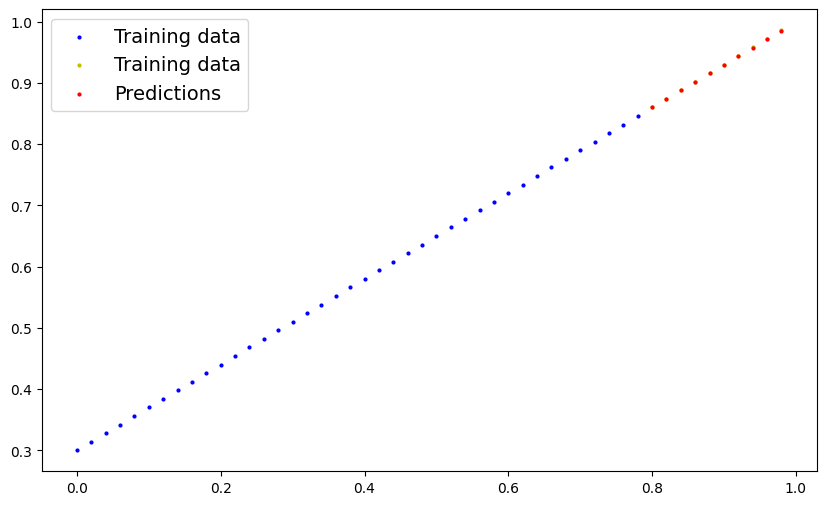

In [61]:
plot_predictions(prediction = y_preds.cpu())

## Saving and loading

In [65]:
import matplotlib.pyplot as plt

#derectry
model_path = Path("MODELS")
model_path.mkdir(parents=True, exist_ok=True)

#save path
model_name = "test1.pth"
model_save_path = model_path / model_name

#save
torch.save( obj = model_1.state_dict(),
            f = model_save_path )

In [70]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=model_save_path))

# put the loaded module to device
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [74]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [73]:
# Evaluvate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_mode_preds = model_1(x_test)
loaded_mode_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')